# Data Visualisation of the Sensor Grid Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functions import file_handler, functions_plot

get_ipython().magic(u'matplotlib inline')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

## 1. Load sensor grid dataset

In [2]:

grid_df = file_handler.load_grid_data() 
grid_df.head()

# Location x, y, z: meters
# I1-I8 : Amps
# Magnetif field Bx, By, Bz: Tesla

('Sensor grid dataset is loaded with a shape of ', (450653, 14))


,x,y,z,I1,I2,I3,I4,I5,I6,I7,I8,Bx,By,Bz
0,0.049637,0.070424,0.221214,26.221050,30.986730,2.077057,-9.057413,14.017315,-3.967512,-20.547283,21.524016,-0.079505,-0.011090,0.037443
1,-0.100441,0.069482,0.171457,18.831238,-9.476340,20.401422,-2.223086,23.530856,-25.898976,0.570288,27.628813,-0.039253,-0.012852,0.036324
2,0.099800,0.023307,0.020556,-12.357873,-8.651945,0.034477,3.027714,-3.157180,-7.030039,-28.057204,-2.028256,0.013445,-0.017138,-0.045580
3,0.099972,0.022124,0.120548,0.281019,-5.812514,7.483533,-6.579473,9.482229,-11.858364,-19.090874,7.060421,-0.029928,0.024631,0.004975
4,-0.000361,0.069913,0.221294,27.249466,9.107255,-8.484128,31.418834,-25.630178,-3.567495,11.764118,-6.391871,0.006062,-0.038407,0.010473


In [3]:
sensorLocs = grid_df.groupby(by=["x","y","z"])
print(sensorLocs.agg(["count"]).head())

knownLocs = list(sensorLocs.groups.keys())
print("\n{} sensors have recorded field measurements.".format(len(knownLocs)))

                               I1    I2    I3    I4    I5    I6    I7    I8  \
                            count count count count count count count count   
x         y        z                                                          
-0.101209 0.121251 0.022060  3787  3787  3787  3787  3787  3787  3787  3787   
-0.101123 0.120660 0.072057  3787  3787  3787  3787  3787  3787  3787  3787   
-0.101037 0.120068 0.122053  3787  3787  3787  3787  3787  3787  3787  3787   
-0.100951 0.119476 0.172050  3787  3787  3787  3787  3787  3787  3787  3787   
-0.100865 0.118885 0.222046  3787  3787  3787  3787  3787  3787  3787  3787   

                               Bx    By    Bz  
                            count count count  
x         y        z                           
-0.101209 0.121251 0.022060  3787  3787  3787  
-0.101123 0.120660 0.072057  3787  3787  3787  
-0.101037 0.120068 0.122053  3787  3787  3787  
-0.100951 0.119476 0.172050  3787  3787  3787  
-0.100865 0.118885 0.222046  37

There are 119 sensors recorded in the dataset, which represent 95.2% of all sensors (5\*5\*5=125). 6 sensors have no readings due to malfunction. At each sensor location, there are 3787 current combinations recorded.

## Each Feature Type Investigation

Features have different ranges (coordinates and currents). They are required to be normalized in the same range to be used for neural network based machine learning methods. Such as between 0 and 1 using min-max scaling. However this is not essential for tree based algoriathms.


### Current

,I1,I2,I3,I4,I5,I6,I7,I8
count,450653.000000,450653.000000,450653.000000,450653.000000,450653.000000,450653.000000,450653.000000,450653.000000
mean,0.021188,-0.404332,-0.136814,0.312389,-0.081282,0.072335,-0.015435,0.386680
std,13.145141,13.351084,13.013090,13.304628,13.286160,13.404727,13.008733,13.531823
min,-34.939354,-34.985997,-34.955790,-34.980512,-34.956567,-34.913527,-34.721420,-34.995599
25%,-7.144258,-8.007331,-7.506255,-7.068861,-7.557013,-7.353731,-7.174826,-6.770363
50%,0.165338,-0.191646,-0.168472,-0.008094,-0.150892,-0.207783,-0.033804,0.377165
75%,7.309115,7.145684,7.184260,7.917182,7.201354,7.381763,7.481295,7.875816
max,34.986298,34.984007,34.988677,34.772943,34.762954,34.750496,34.963851,34.932359


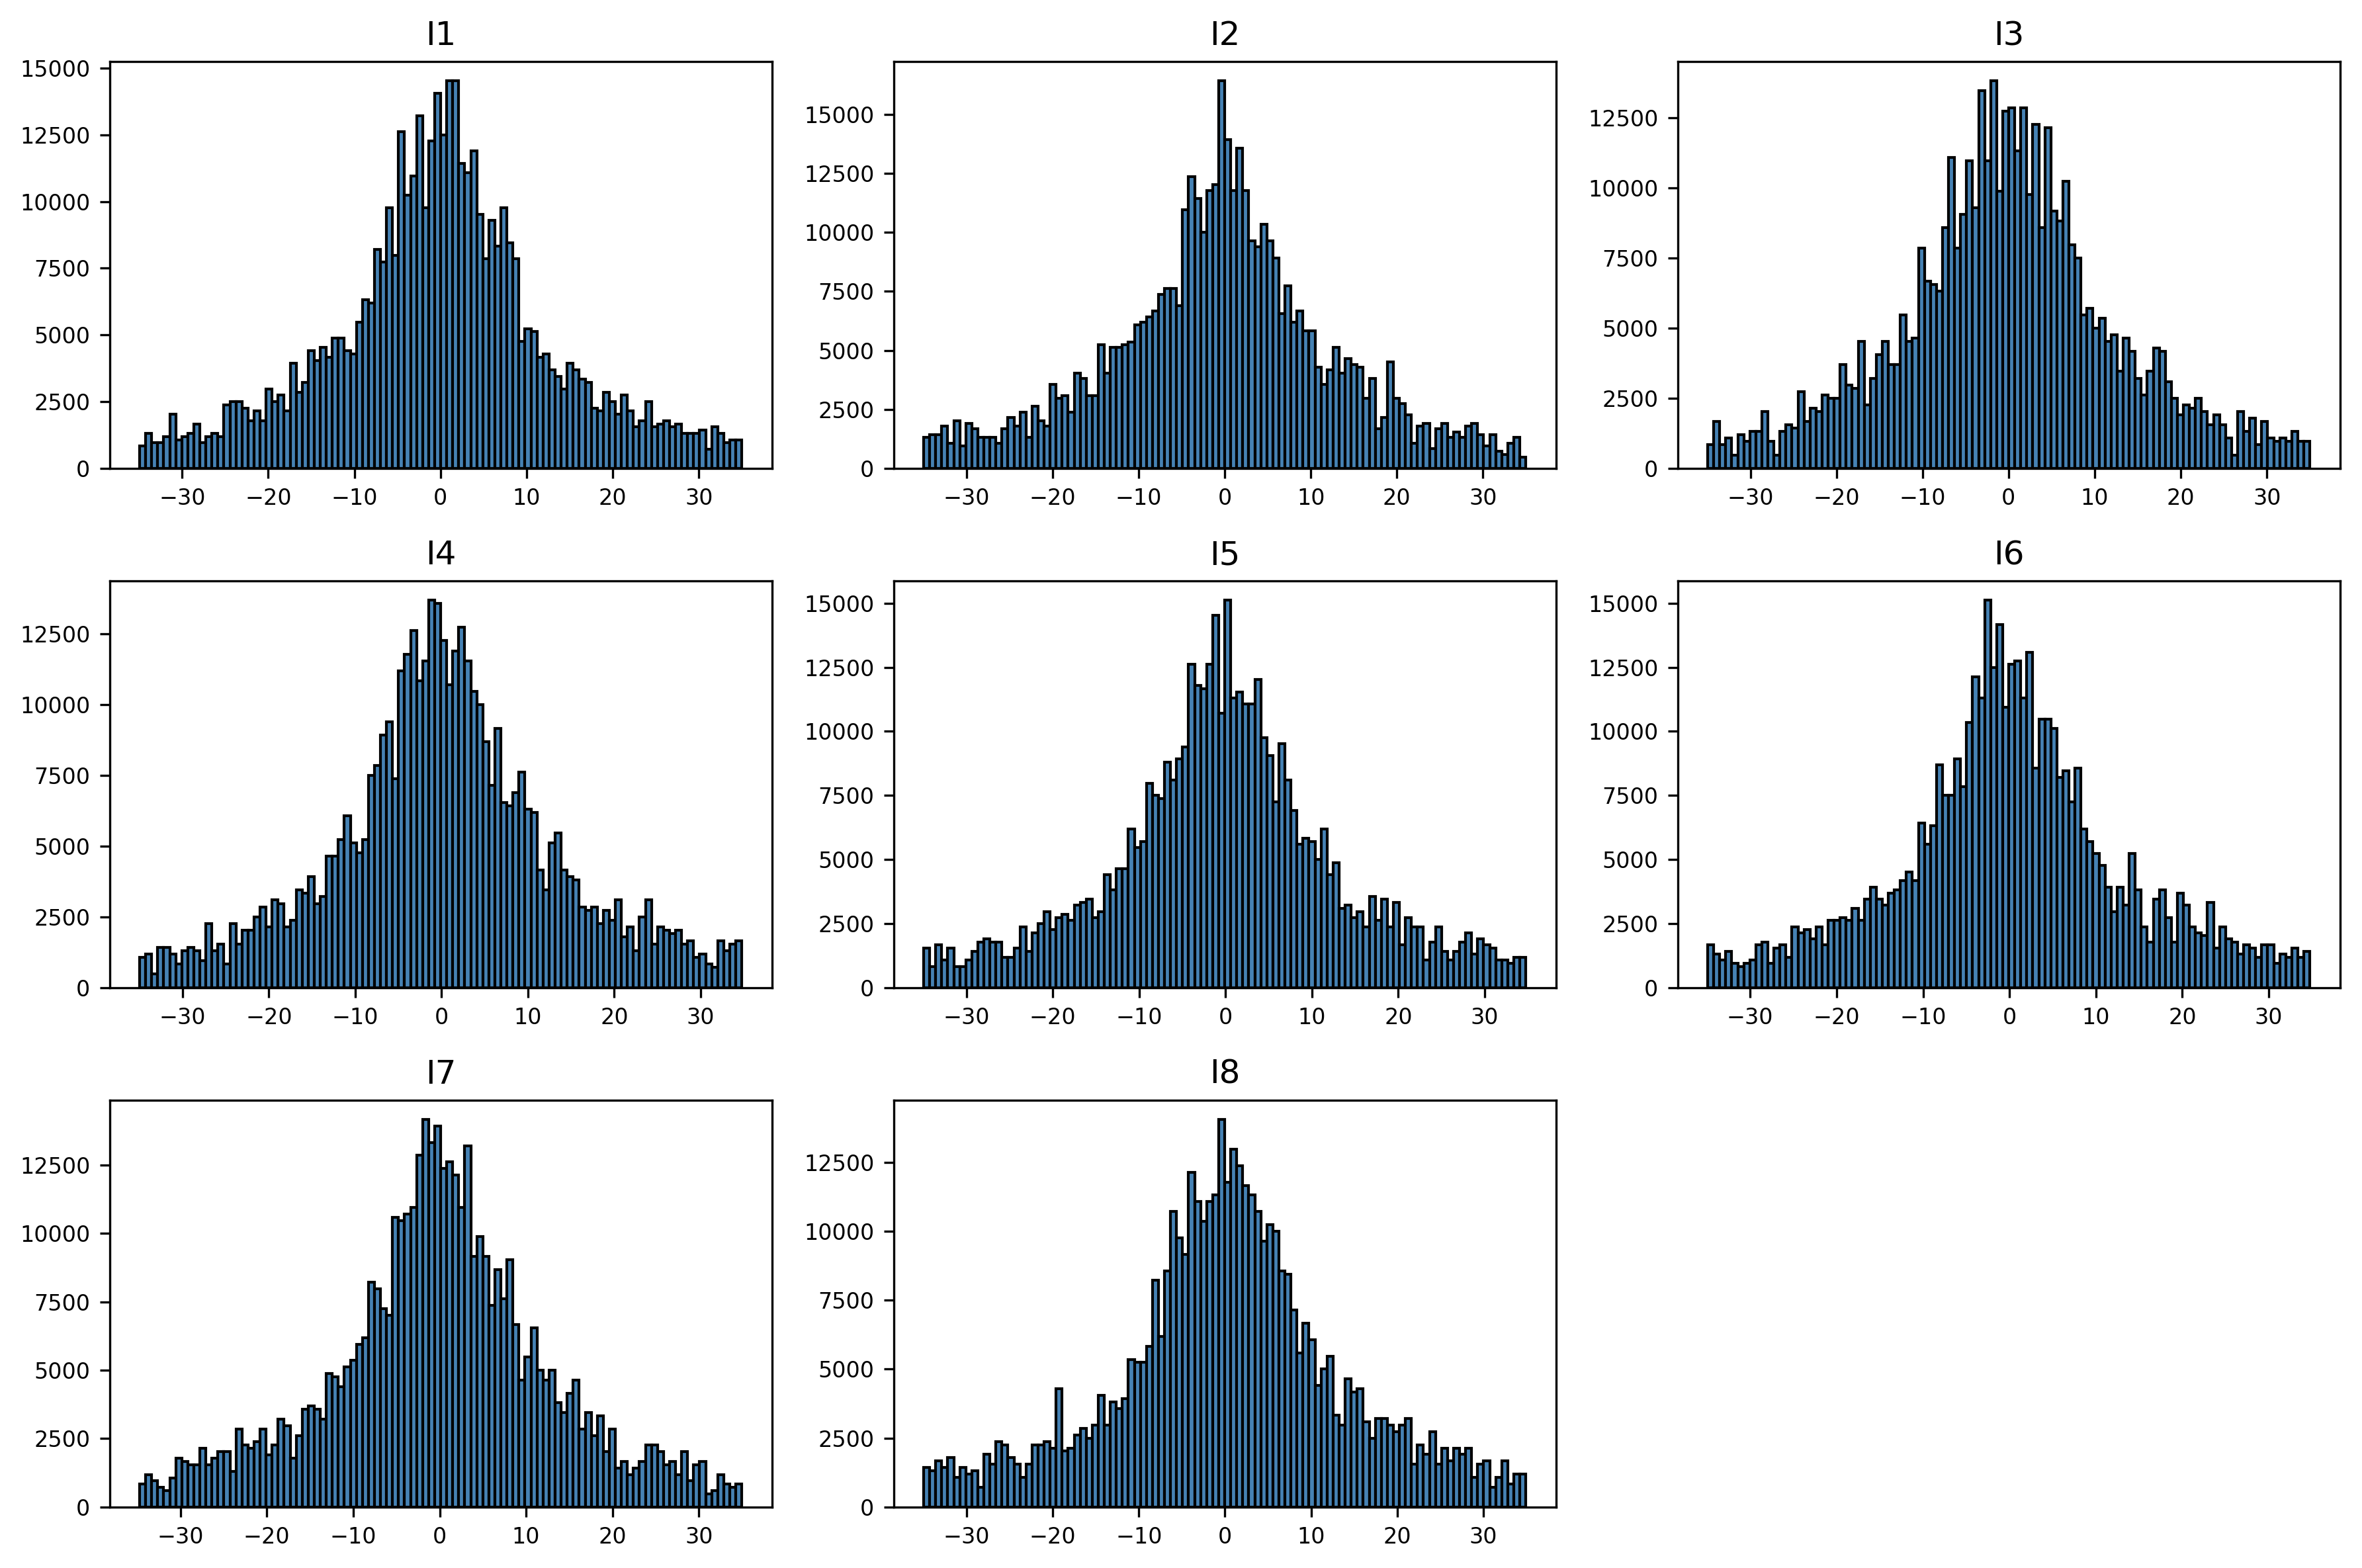

In [4]:

currents = grid_df[["I{}".format(i) for i in range(1,9)]]
# consider current value only, and ignore the direction of currents (currents.abs() function)
# currents = currents.abs()
currents.hist(bins = 100, color = "steelblue", edgecolor = "black",
              linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout(rect=(0, 0, 2, 2))
currents.describe()

In [13]:
currents.plot()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 1800x1200 with 1 Axes>

### Locations

('Malfunction sensors located at:\n', array([[-0.1 , -0.03,  0.17],
       [ 0.  ,  0.12,  0.02],
       [ 0.  ,  0.12,  0.07],
       [ 0.  ,  0.12,  0.12],
       [ 0.  ,  0.12,  0.17],
       [ 0.  ,  0.12,  0.22]]))


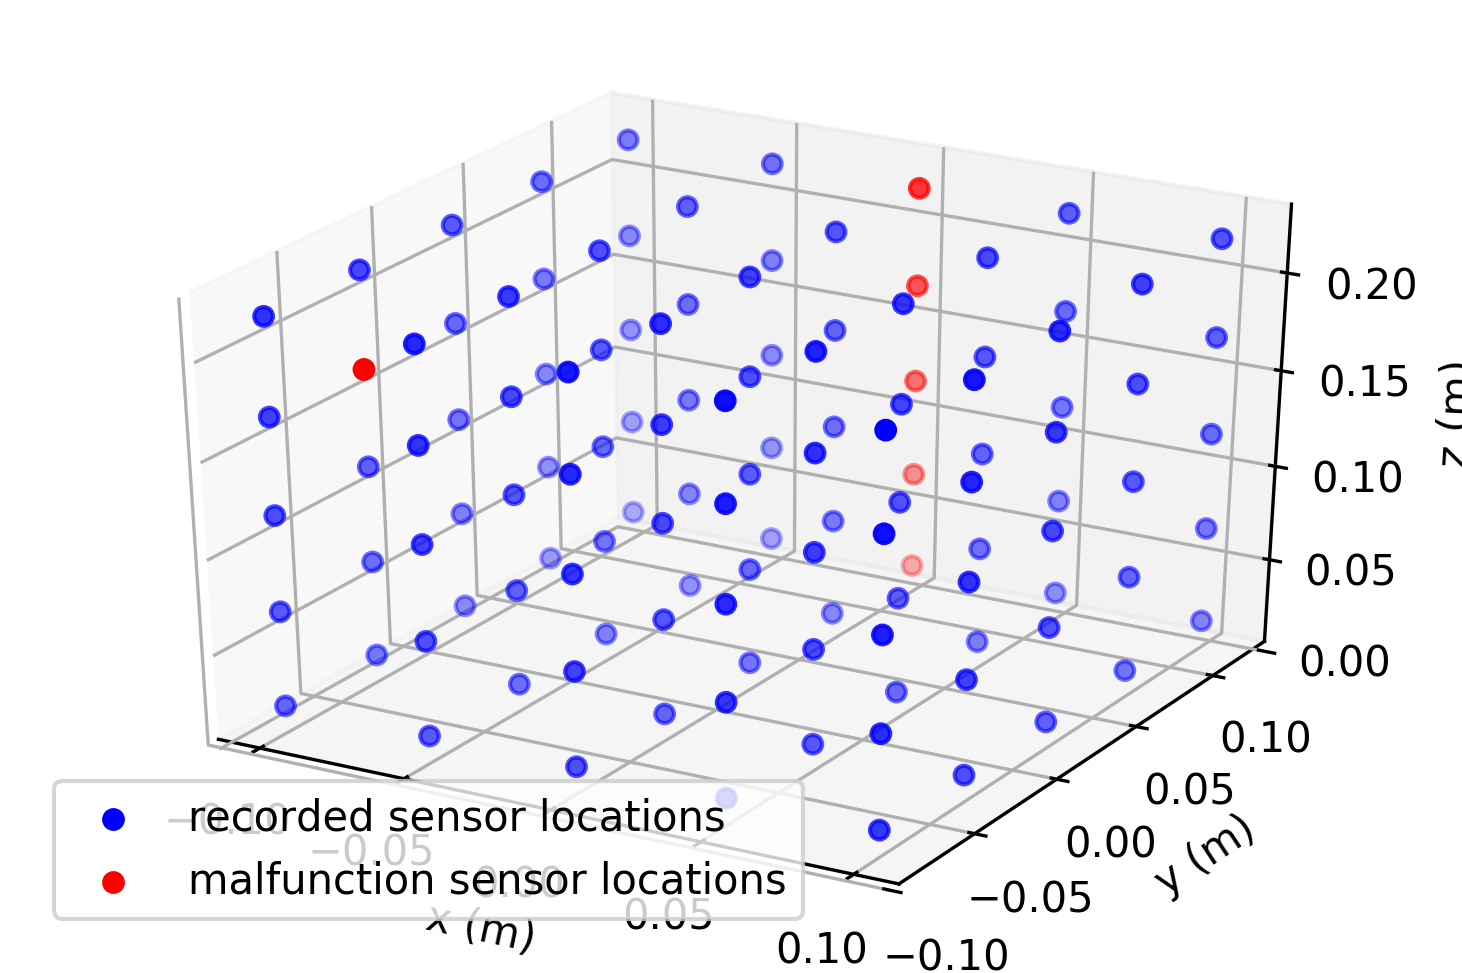

In [6]:

import itertools as it
from mpl_toolkits import mplot3d

# round each coordinates to 2 decimal place
loc_x = [round(v,2) for v in grid_df["x"]]
loc_y = [round(v,2) for v in grid_df["y"]]
loc_z = [round(v,2) for v in grid_df["z"]]

unique_loc_x = np.unique(loc_x)
unique_loc_y = np.unique(loc_y)
unique_loc_z = np.unique(loc_z)

# https://stackoverflow.com/questions/42930101/extract-different-rows-from-two-numpy-2d-arrays

all_locations = np.vstack(np.meshgrid(unique_loc_x, unique_loc_y, unique_loc_z)).reshape(3,-1).T
known_coordinates = np.unique(np.stack((loc_x, loc_y, loc_z), axis=-1), axis=0)

index = np.argwhere((known_coordinates[:,None,:] == all_locations[:,:]).all(-1))[:, 1]
missedLocs = all_locations[np.setdiff1d(np.arange(len(all_locations)), index)]
print("Malfunction sensors located at:\n", missedLocs)

functions_plot.plot_3D_coordinates([known_coordinates, missedLocs], ["recorded sensor locations", "malfunction sensor locations"])

,x,y,z
count,450653.000000,450653.000000,450653.000000
mean,0.085552,1.733454,12.024207
std,7.189069,6.924913,7.085999
min,-10.120917,-8.109085,1.937066
25%,-5.070189,-2.991373,6.995955
50%,0.031534,2.094066,12.062840
75%,5.082262,7.152617,17.137720
max,10.116394,12.329492,22.204605


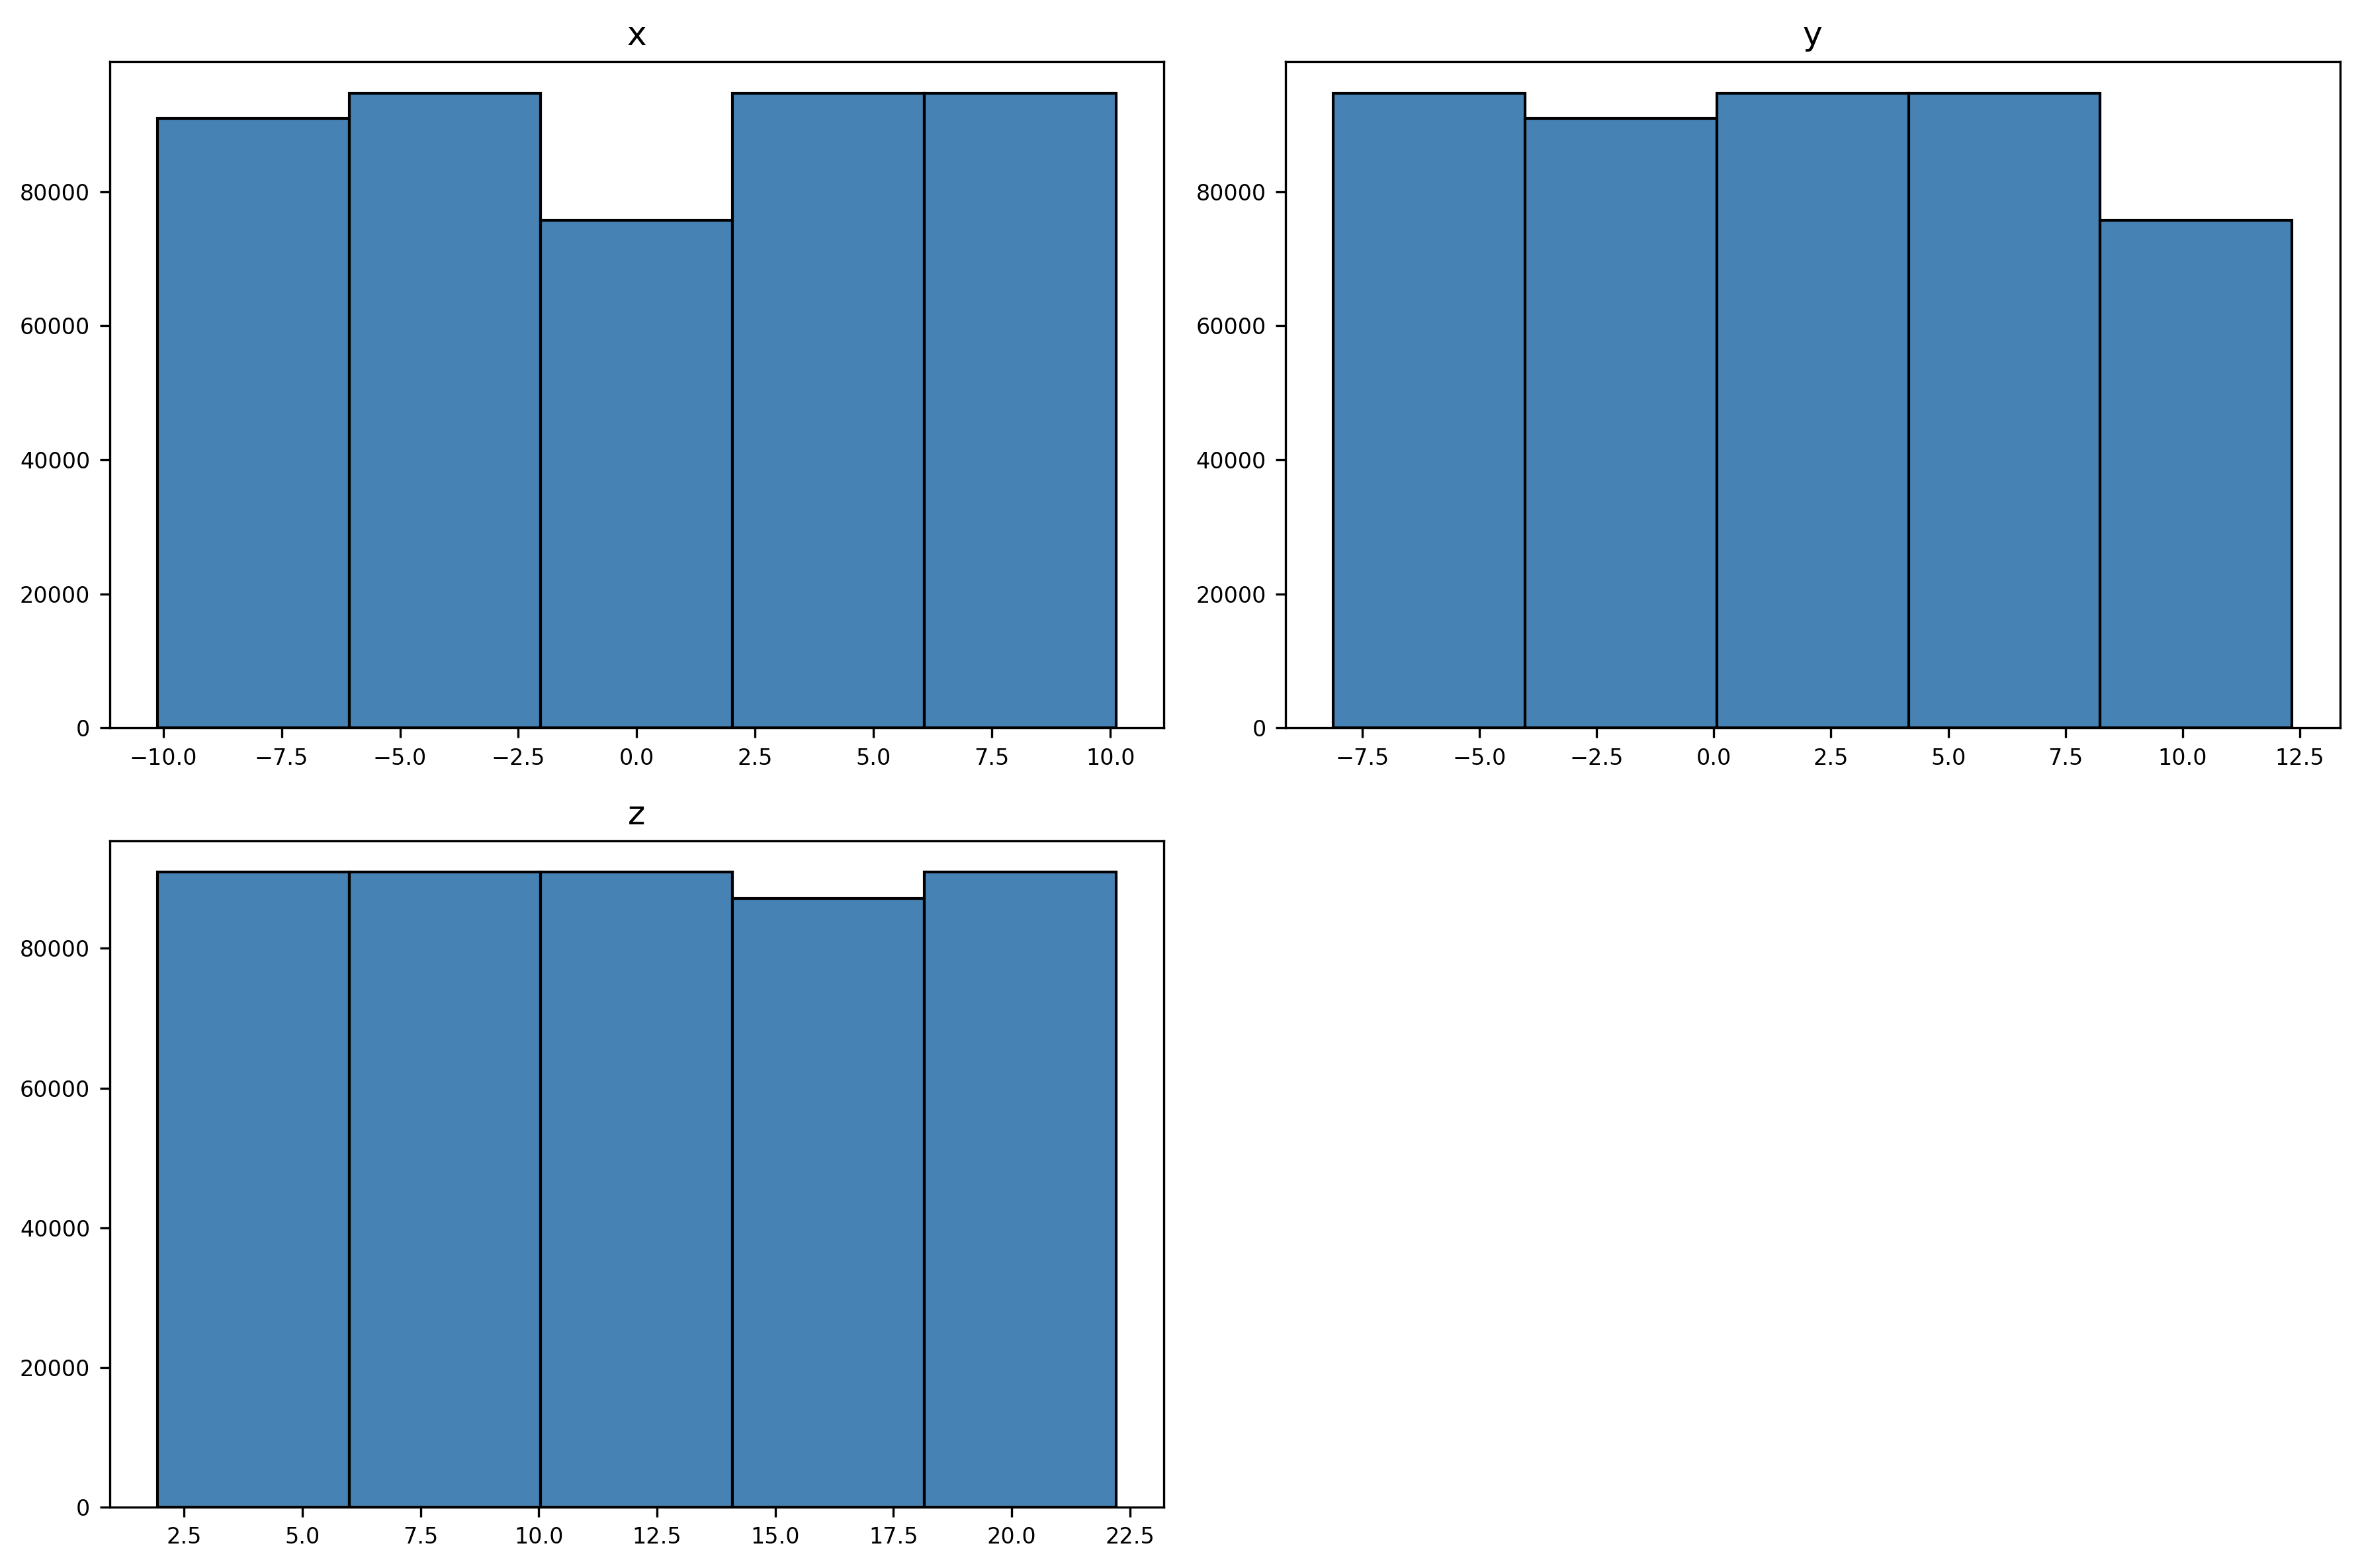

In [7]:
# coordinates in cm
loc = grid_df[["x", "y", "z"]]*100
loc.hist(bins = 5, color = "steelblue", edgecolor = "black",
        linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout(rect=(0, 0, 2, 2))
loc.describe()
# print(loc.x.unique)

### Magnetic field

,Bx,By,Bz
count,450653.000000,450653.000000,450653.000000
mean,-0.151994,0.679620,0.749289
std,38.274931,34.890720,27.635943
min,-179.349038,-166.811093,-179.498417
25%,-23.535436,-20.890537,-13.181012
50%,-0.475115,0.909366,0.847830
75%,22.907699,22.158728,14.873489
max,178.462261,170.448732,183.892109


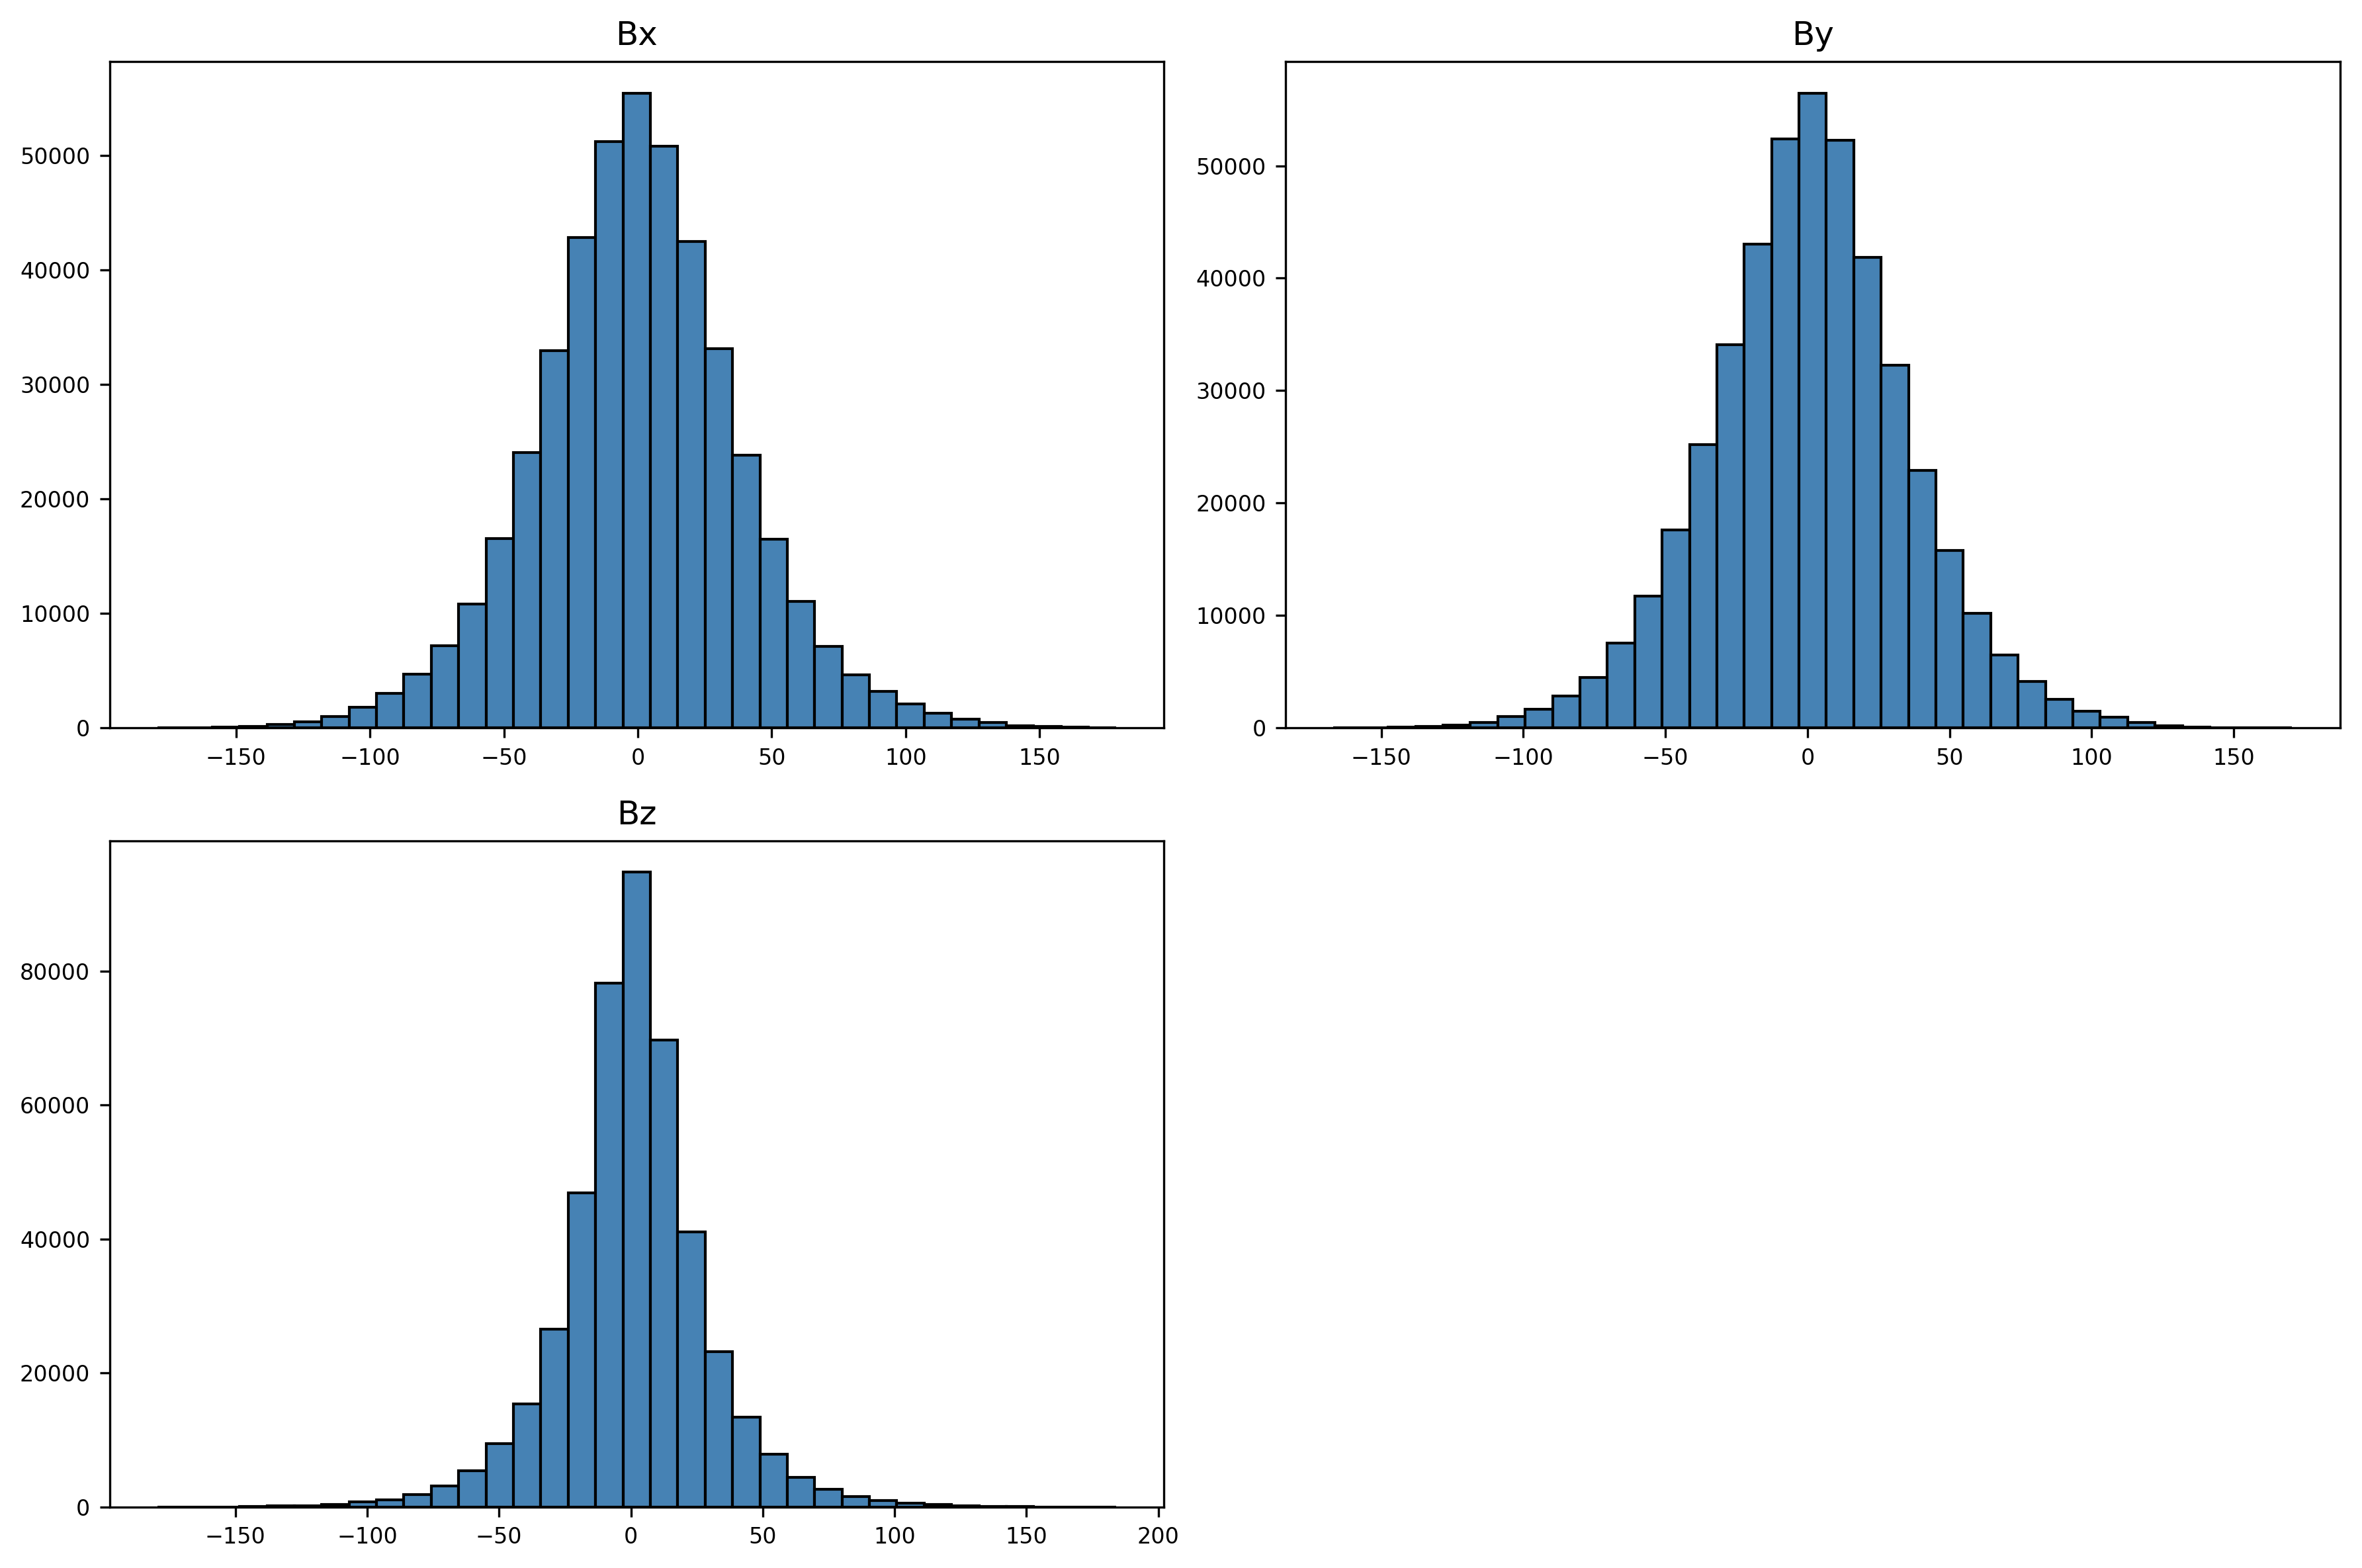

In [8]:
# field in mT
bField = grid_df[["Bx", "By", "Bz"]]*1000
bField.hist(bins = 35, color = "steelblue", edgecolor = "black",
        linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout(rect=(0, 0, 2, 2))
bField.describe()

## Multivariate Feature Visualization of the sensor grid dataset

TypeError: a float is required

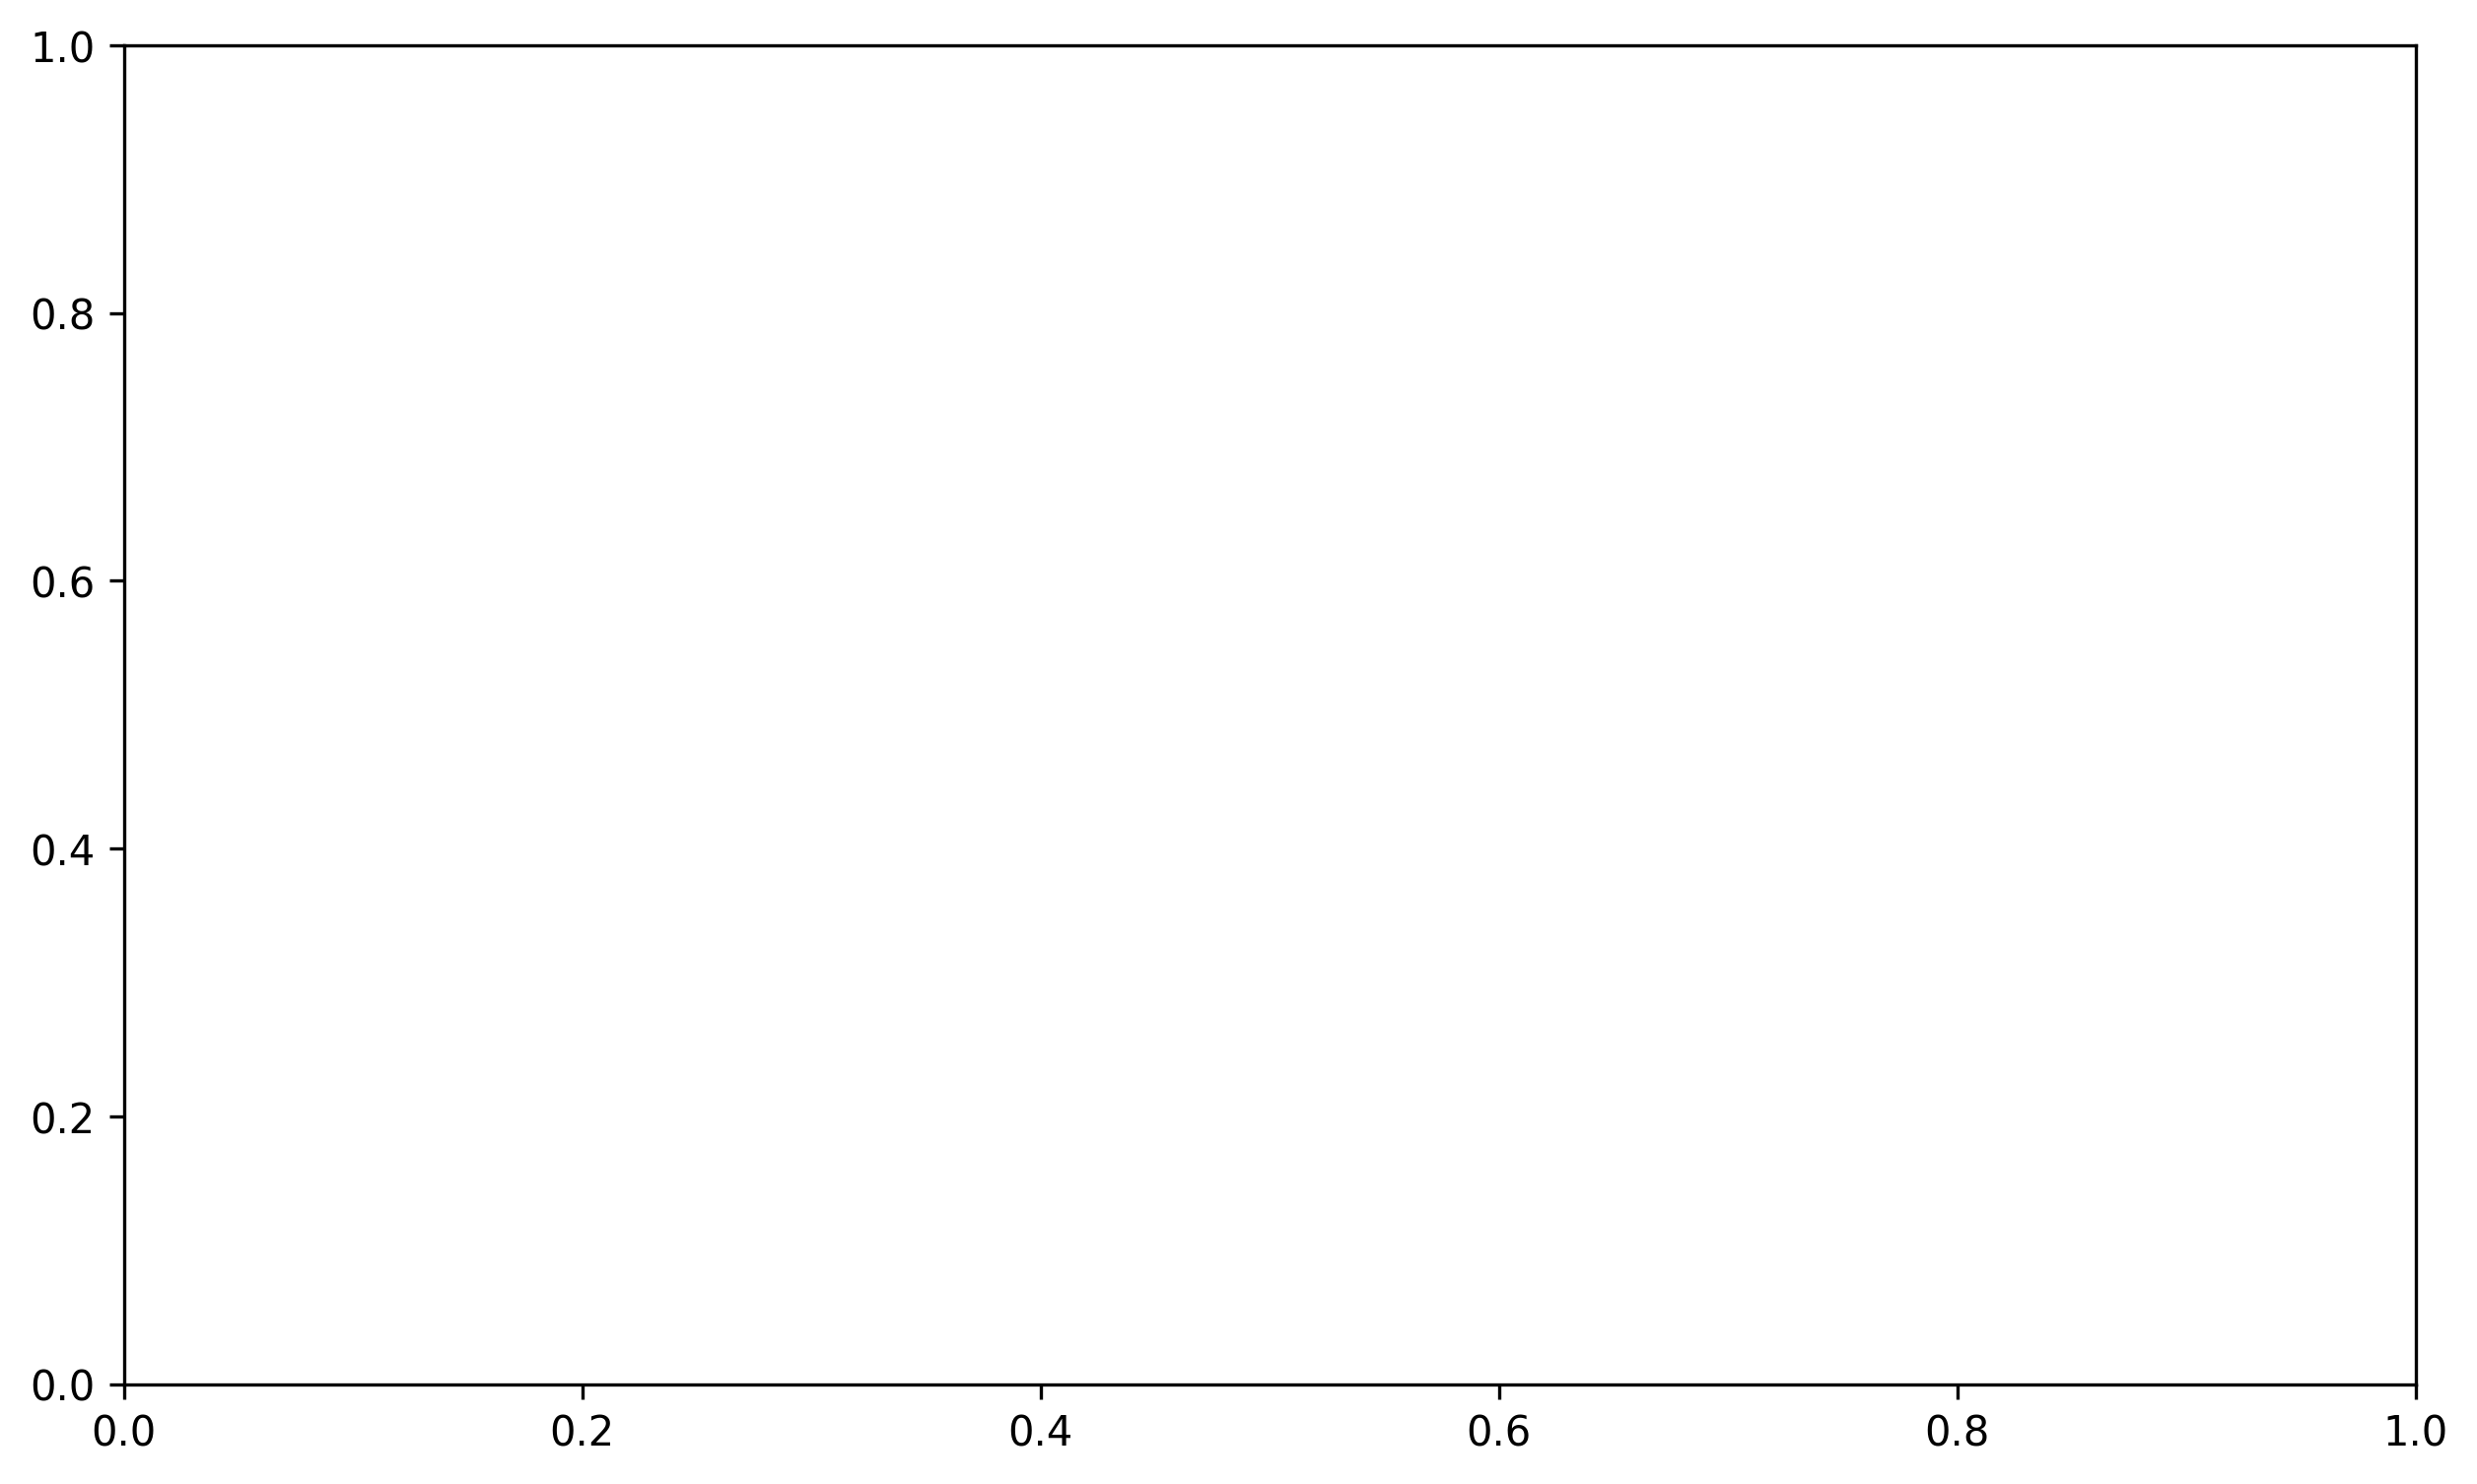

In [9]:
# Correlation Matrix Heatmap

features = grid_df.iloc[:,0:-3]
f, ax = plt.subplots(figsize=(10, 6))
corr = features.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features Correlation Heatmap', fontsize=14)

# save figure
# f.savefig("../Figures/feature_correlation.png", dpi=300)

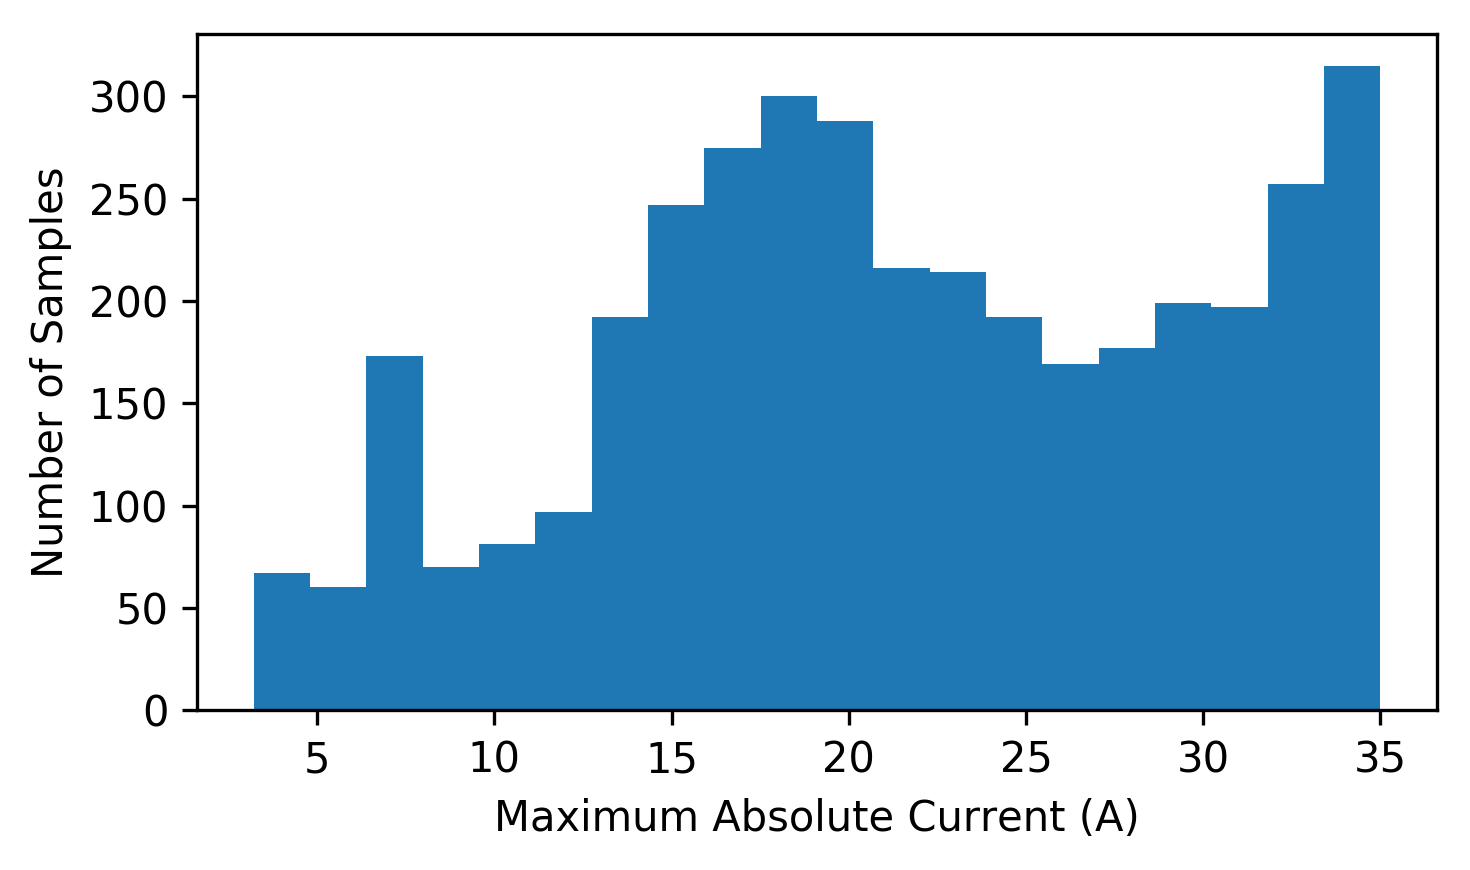

In [2]:
feature_mat = np.load('../Data/cmag_data/calibration_cube_processed/master_feature_matrix_v5.npy')
currents_all = np.unique(feature_mat[:,3:11],axis=0)
plt.figure(figsize=(5,3))
plt.hist(np.max(np.abs(currents_all), axis=1),bins=20)
plt.xlabel('Maximum Absolute Current (A)')
plt.ylabel('Number of Samples')
plt.tight_layout()
#plt.savefig('../Figures/currents_histogram.pdf')
#plt.grid()